In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
from ocr.tools.config import Cfg
from ocr.model.train import Trainer

In [3]:
config = Cfg.load_config_from_name('vgg_transformer')

<Response [200]>
<Response [200]>


In [4]:
dataset_params = {
    'name':'hw',
    'data_root':'../../Datasets/datasets/',
    'train_annotation':'train.txt',
    'valid_annotation':'test.txt'
}

params = {
         'print_every':200,
         'valid_every':5000,
          'iters':30000,
          'checkpoint':'./weights/transformerocr.pth',    
          'export':'./weights/vgg_transformerocr2.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [6]:
trainer = Trainer(config, pretrained=True)

{'a': 4, 'A': 5, 'à': 6, 'À': 7, 'ả': 8, 'Ả': 9, 'ã': 10, 'Ã': 11, 'á': 12, 'Á': 13, 'ạ': 14, 'Ạ': 15, 'ă': 16, 'Ă': 17, 'ằ': 18, 'Ằ': 19, 'ẳ': 20, 'Ẳ': 21, 'ẵ': 22, 'Ẵ': 23, 'ắ': 24, 'Ắ': 25, 'ặ': 26, 'Ặ': 27, 'â': 28, 'Â': 29, 'ầ': 30, 'Ầ': 31, 'ẩ': 32, 'Ẩ': 33, 'ẫ': 34, 'Ẫ': 35, 'ấ': 36, 'Ấ': 37, 'ậ': 38, 'Ậ': 39, 'b': 40, 'B': 41, 'c': 42, 'C': 43, 'd': 44, 'D': 45, 'đ': 46, 'Đ': 47, 'e': 48, 'E': 49, 'è': 50, 'È': 51, 'ẻ': 52, 'Ẻ': 53, 'ẽ': 54, 'Ẽ': 55, 'é': 56, 'É': 57, 'ẹ': 58, 'Ẹ': 59, 'ê': 60, 'Ê': 61, 'ề': 62, 'Ề': 63, 'ể': 64, 'Ể': 65, 'ễ': 66, 'Ễ': 67, 'ế': 68, 'Ế': 69, 'ệ': 70, 'Ệ': 71, 'f': 72, 'F': 73, 'g': 74, 'G': 75, 'h': 76, 'H': 77, 'i': 78, 'I': 79, 'ì': 80, 'Ì': 81, 'ỉ': 82, 'Ỉ': 83, 'ĩ': 84, 'Ĩ': 85, 'í': 86, 'Í': 87, 'ị': 88, 'Ị': 89, 'j': 90, 'J': 91, 'k': 92, 'K': 93, 'l': 94, 'L': 95, 'm': 96, 'M': 97, 'n': 98, 'N': 99, 'o': 100, 'O': 101, 'ò': 102, 'Ò': 103, 'ỏ': 104, 'Ỏ': 105, 'õ': 106, 'Õ': 107, 'ó': 108, 'Ó': 109, 'ọ': 110, 'Ọ': 111, 'ô': 112, 'Ô': 113, '

/home/ducvh/.conda/envs/paddle_env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ducvh/.conda/envs/paddle_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
cnn.model.last_conv1x1.weight not found
cnn.model.last_conv1x1.bias not found
transformer.embed_tgt.weight missmatching shape, required torch.Size([238, 256]) but found torch.Size([233, 256])
transformer.fc.weight missmatching shape, required torch.Size([238, 256]) but found torch.Size([233, 256])
transformer.fc.bias missmatching shape, required torch.Size([238]) but found torch.Size([233])
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|████████████████████████████| 776953/776953 [00:13<00:00, 56495.79it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|████████████████████████████| 118809/118809 [00:01<00:00, 69265.17it/s]


In [7]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"€#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~²“−” ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 5000,
  'iters': 30000,
  'export': './weights/vgg_transformerocr2.pth',
  'checkpoint': './weights/transformerocr.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': '../../Datasets/datasets/',
  'train_annotation': 'train.txt',
  'valid_annotation': 'test.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 5

In [8]:
trainer.config.save('config.yml')

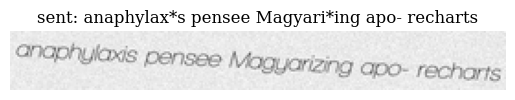

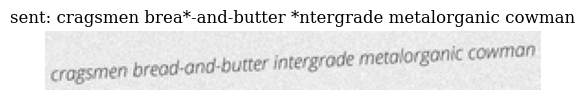

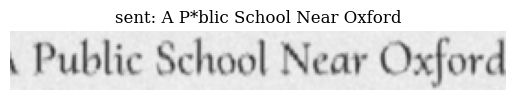

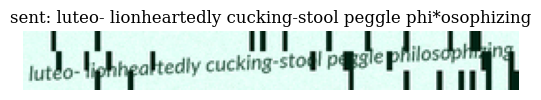

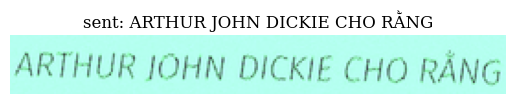

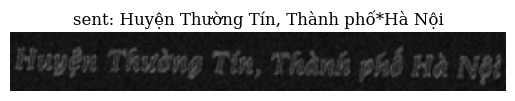

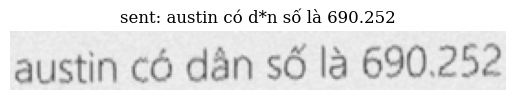

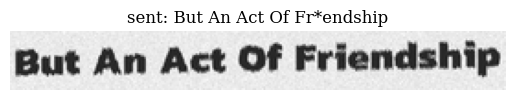

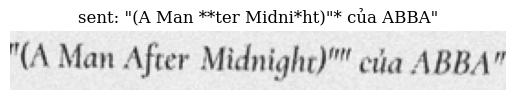

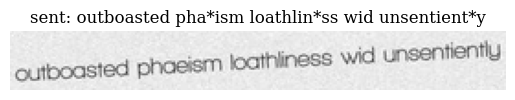

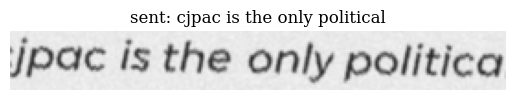

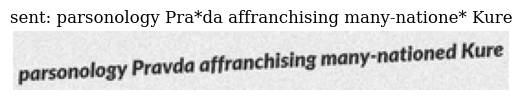

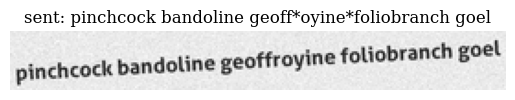

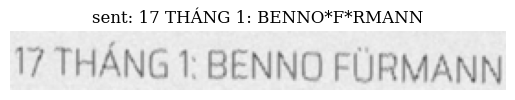

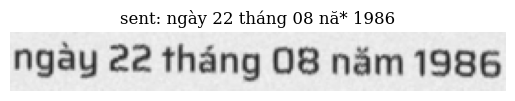

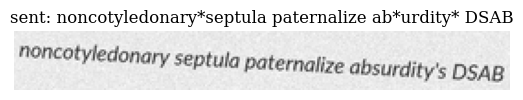

In [9]:
trainer.visualize_dataset()

In [10]:
trainer.train()

/home/ducvh/.conda/envs/paddle_env/lib/python3.8/site-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


iter: 000200 - train loss: 2.627 - lr: 1.51e-05 - load time: 0.72 - gpu time: 97.80
iter: 000400 - train loss: 2.367 - lr: 2.45e-05 - load time: 0.06 - gpu time: 91.02
iter: 000600 - train loss: 2.212 - lr: 3.95e-05 - load time: 0.07 - gpu time: 93.54
iter: 000800 - train loss: 2.210 - lr: 5.97e-05 - load time: 0.06 - gpu time: 89.87
iter: 001000 - train loss: 2.102 - lr: 8.40e-05 - load time: 0.06 - gpu time: 89.45
iter: 001200 - train loss: 1.987 - lr: 1.12e-04 - load time: 0.06 - gpu time: 89.98
iter: 001400 - train loss: 1.971 - lr: 1.41e-04 - load time: 0.06 - gpu time: 90.79
iter: 001600 - train loss: 1.871 - lr: 1.71e-04 - load time: 0.07 - gpu time: 87.33
iter: 001800 - train loss: 1.686 - lr: 2.01e-04 - load time: 0.06 - gpu time: 92.68
iter: 002000 - train loss: 1.092 - lr: 2.28e-04 - load time: 0.06 - gpu time: 90.69
iter: 002200 - train loss: 0.860 - lr: 2.52e-04 - load time: 0.07 - gpu time: 89.23
iter: 002400 - train loss: 0.793 - lr: 2.73e-04 - load time: 0.07 - gpu time

/home/ducvh/myproject/Vietnamese-OCR/TextRecognition/ocr/tools/translate.py:123: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1)/(char_probs>0).sum(-1)


iter: 005000 - valid loss: 0.615 - acc full seq: 0.7050 - acc per char: 0.9063
iter: 005200 - train loss: 0.614 - lr: 2.95e-04 - load time: 0.08 - gpu time: 90.33
iter: 005400 - train loss: 0.620 - lr: 2.94e-04 - load time: 0.06 - gpu time: 89.76
iter: 005600 - train loss: 0.612 - lr: 2.93e-04 - load time: 0.07 - gpu time: 87.07
iter: 005800 - train loss: 0.624 - lr: 2.92e-04 - load time: 0.06 - gpu time: 91.64
iter: 006000 - train loss: 0.631 - lr: 2.91e-04 - load time: 0.06 - gpu time: 90.72
iter: 006200 - train loss: 0.612 - lr: 2.90e-04 - load time: 0.07 - gpu time: 88.40
iter: 006400 - train loss: 0.615 - lr: 2.88e-04 - load time: 0.06 - gpu time: 91.77
iter: 006600 - train loss: 0.627 - lr: 2.87e-04 - load time: 0.06 - gpu time: 92.83
iter: 006800 - train loss: 0.607 - lr: 2.86e-04 - load time: 0.06 - gpu time: 90.13
iter: 007000 - train loss: 0.609 - lr: 2.84e-04 - load time: 0.06 - gpu time: 87.34
iter: 007200 - train loss: 0.623 - lr: 2.82e-04 - load time: 0.06 - gpu time: 89.

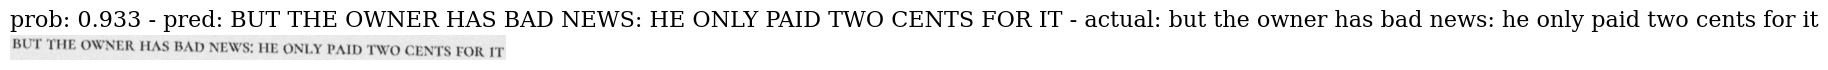

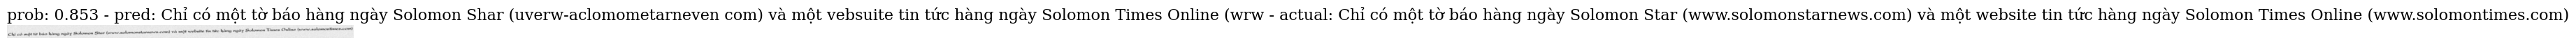

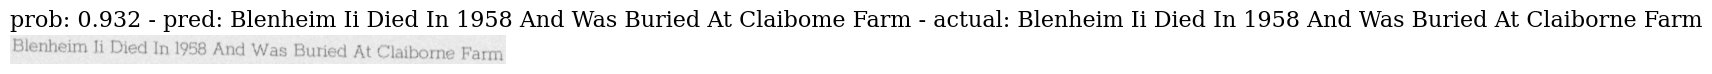

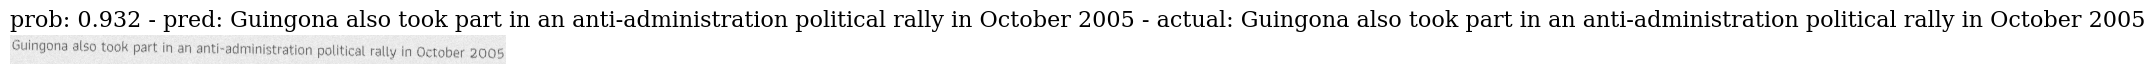

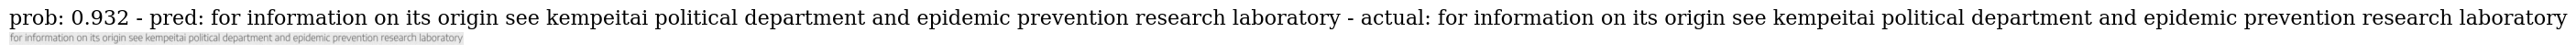

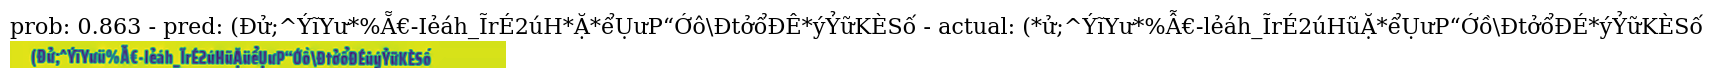

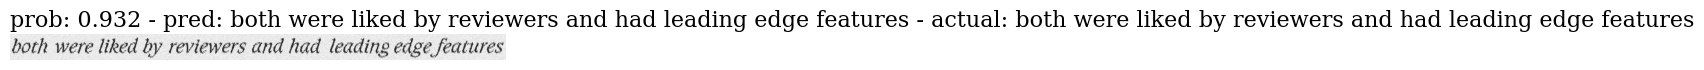

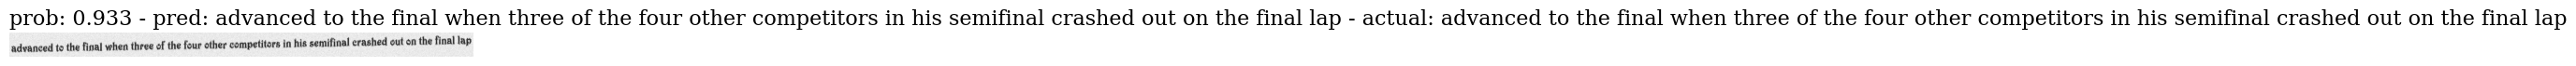

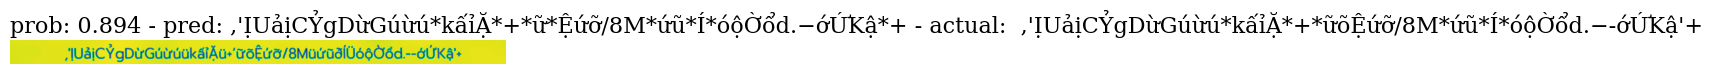

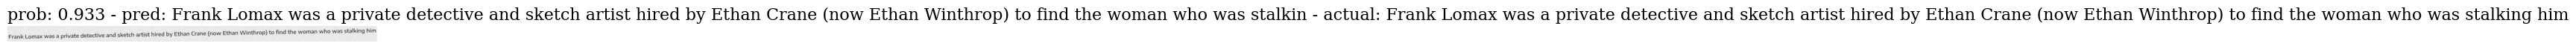

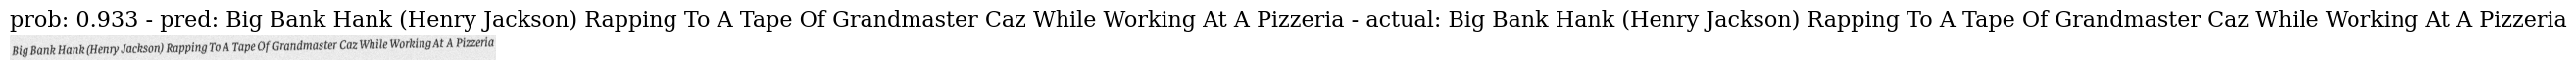

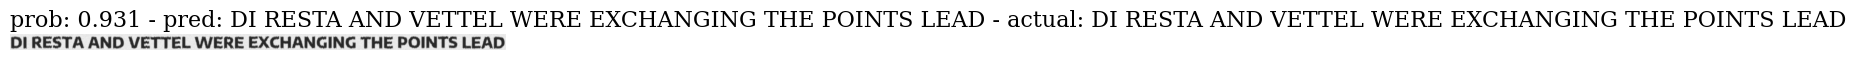

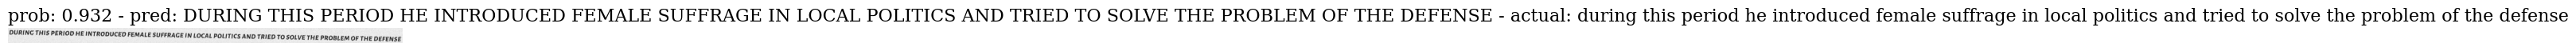

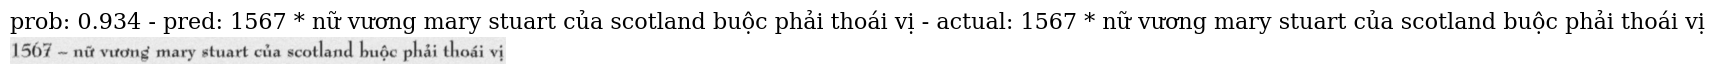

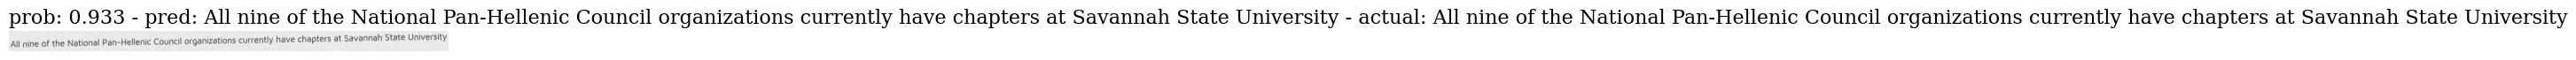

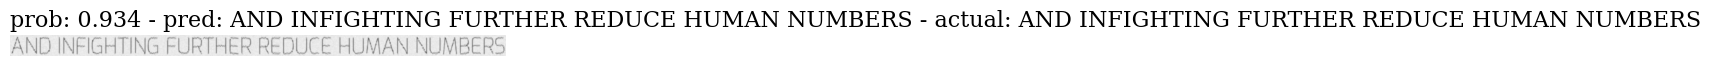

In [11]:
trainer.visualize_prediction()